In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1= pd.read_csv("/content/생필품 농수축산물 가격 정보(2019년).csv", encoding='cp949')
df2= pd.read_csv("/content/생필품 농수축산물 가격 정보(2020년).csv", encoding='cp949')
df3= pd.read_csv("/content/생필품 농수축산물 가격 정보(2021년).csv", encoding='cp949')

In [3]:
df_one = pd.merge(df1, df2, how = 'outer')
df_two = pd.merge(df_one, df3,how = 'outer')

In [4]:
df_two.describe()

,일련번호,시장/마트 번호,품목 번호,가격(원),시장유형 구분(시장/마트) 코드,자치구 코드
count,3.208430e+05,320843.000000,320843.000000,3.208430e+05,320843.000000,320843.000000
mean,1.556445e+06,103.142671,212.581568,1.346572e+04,1.510072,415991.341560
std,9.823942e+04,68.695718,109.217373,4.227410e+06,0.499899,185545.761174
min,1.357080e+06,1.000000,13.000000,0.000000e+00,1.000000,110000.000000
25%,1.473784e+06,44.000000,119.000000,2.000000e+03,1.000000,260000.000000
50%,1.560484e+06,92.000000,265.000000,3.450000e+03,2.000000,410000.000000
75%,1.641340e+06,146.000000,307.000000,5.950000e+03,2.000000,560000.000000
max,1.724779e+06,229.000000,324.000000,2.394024e+09,2.000000,740000.000000


In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [6]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

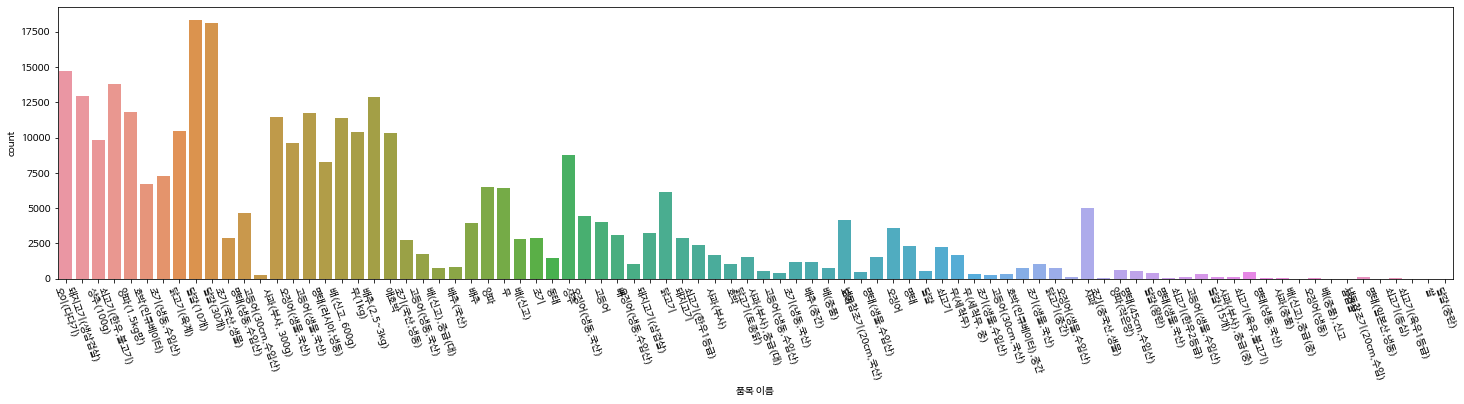

In [7]:
plt.figure(figsize=(25, 5))
plt.xticks(rotation = -70 )
sns.countplot(x="품목 이름", data=df_two)

In [8]:
df_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320843 entries, 0 to 320842
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   일련번호               320843 non-null  int64 
 1   시장/마트 번호           320843 non-null  int64 
 2   시장/마트 이름           320843 non-null  object
 3   품목 번호              320843 non-null  int64 
 4   품목 이름              320787 non-null  object
 5   실판매규격              320843 non-null  object
 6   가격(원)              320843 non-null  int64 
 7   년도-월               320843 non-null  object
 8   비고                 253682 non-null  object
 9   시장유형 구분(시장/마트) 코드  320843 non-null  int64 
 10  시장유형 구분(시장/마트) 이름  320843 non-null  object
 11  자치구 코드             320843 non-null  int64 
 12  자치구 이름             320843 non-null  object
 13  점검일자               320843 non-null  object
dtypes: int64(6), object(8)
memory usage: 44.8+ MB


In [9]:
df_two.value_counts("품목 이름")

품목 이름
달걀(10개)        18337
달걀(30개)        18105
오이(다다기)        14718
쇠고기(한우,불고기)    13807
돼지고기(생삼겹살)     12942
               ...  
배(중품),신고           5
쌀                  3
삼겹살                2
명태(일본산,냉동)         2
달걀(중란)             1
Length: 86, dtype: int64

In [10]:
region_name = df_two['자치구 이름']
region_code = df_two['자치구 코드']
region = {}
for i in range(len(region_code)):
  region[region_code[i]] = region_name[i]
print(region)

{545000: '금천구', 680000: '강남구', 560000: '영등포구', 740000: '강동구', 410000: '서대문구', 230000: '동대문구', 500000: '강서구', 440000: '마포구', 140000: '중구', 305000: '강북구', 710000: '송파구', 260000: '중랑구', 215000: '광진구', 320000: '도봉구', 590000: '동작구', 170000: '용산구', 470000: '양천구', 290000: '성북구', 650000: '서초구', 530000: '구로구', 620000: '관악구', 350000: '노원구', 110000: '종로구', 200000: '성동구', 380000: '은평구'}


In [11]:
cat_name = df_two['품목 이름']
cat_code = df_two['품목 번호']
cat = {}
for j in range(len(cat_code)):
    cat[cat_code[j]] = cat_name[j]
print(cat)

{311: '오이(다다기)', 202: '돼지고기(생삼겹살)', 310: '상추(100g)', 58: '쇠고기(한우,불고기)', 309: '양파(1.5kg망)', 119: '호박(인큐베이터)', 260: '조기(냉동,수입산)', 283: '닭고기(육계)', 171: '달걀(10개)', 320: '달걀(30개)', 136: '조기(국산,생물)', 264: '명태(냉동,수입산)', 318: '고등어(30cm,수입산)', 305: '사과(부사, 300g)', 254: '오징어(생물,국산)', 266: '고등어(생물,국산)', 152: '명태(러시아,냉동)', 306: '배(신고, 600g)', 308: '무(1kg)', 307: '배추(2.5~3kg)', 312: '애호박', 144: '조기(국산,냉동)', 268: '고등어(냉동,국산)', 248: '배(신고),중급(대)', 125: '배추(국산)', 26: '배추', 24: '양파', 25: '무', 276: '배(신고)', 303: '조기', 288: '동태', 23: '상추', 256: '오징어(냉동,국산)', 13: '고등어', 27: '배', 257: '오징어(냉동,수입산)', 52: '돼지고기(삼겹살)', 18: '닭고기', 285: '돼지고기', 131: nan, 50: '사과(부사)', 277: '호박', 138: '닭고기(토종닭)', 99: '돼지고기(생삼겹살)', 244: '사과(부사),중급(대)', 269: '고등어(냉동,수입산)', 259: '조기(냉동,국산)', 271: '배추(중간)', 284: '배(중품)', 22: '오이', 304: '고등어', 314: '냉동참조기(20cm,국산)', 265: '명태(생물,수입산)', 253: '오징어', 302: '명태', 17: '달걀', 278: '쇠고기', 282: '무(세척무)', 175: '배추(중간)', 274: '무(세척무, 중)', 261: '조기(생물,수입산)', 316: '고등어(30cm,국산)', 118: '호박(인큐베이터),중간

In [12]:
market_name = df_two['시장/마트 이름']
market_code = df_two['시장/마트 번호']
market = {}
for k in range(len(market_code)):
      market[market_code[k]] = market_name[k]
print(market)

{116: '홈플러스 시흥점', 115: '남문시장', 114: '현대시장', 222: '홈플러스 독산점', 44: '이마트 역삼점', 130: '롯데백화점 영등포점', 154: '홈플러스 강동점', 31: '인왕시장', 88: '롯데백화점 청량리점', 45: '롯데백화점 강남점', 213: '화곡본동시장', 123: '홈플러스 월드컵점', 8: '롯데마트 서울역점', 66: '수유재래시장', 153: '이마트 명일점', 147: '롯데백화점 잠실점', 91: '동원시장', 40: '홈플러스 등촌점', 80: '이마트 자양점', 27: '이마트 창동점', 127: '남성시장', 10: '용문시장', 102: '목3동시장', 214: '이마트 목동점', 90: '우림시장', 13: '돈암제일시장', 217: '방림시장', 120: '망원시장', 151: '암사종합시장', 28: '홈플러스 방학점', 22: '이마트 여의도점', 19: '대림중앙시장', 56: '롯데백화점', 218: '신세계백화점 강남점', 108: '남구로시장', 140: '하나로클럽 양재점', 133: '원당종합시장', 25: '방학동도깨비시장', 33: '현대백화점 신촌점', 11: '남대문시장', 103: '신영시장', 96: '공릉동 도깨비시장', 82: '롯데마트 강변점', 32: '영천시장', 148: '홈플러스 잠실점', 1: '통인시장', 26: '신창시장', 2: '신세계백화점', 129: '태평백화점', 206: '하나로클럽 미아점', 15: '이마트 미아점', 136: '세이브 마트', 94: '홈플러스 면목점', 60: '이마트 청계점', 20: '영등포전통시장', 216: '도곡시장', 145: '마천중앙시장', 134: '신원시장(신림1동)', 21: '홈플러스 영등포점', 207: '관악신사시장(신림4동)', 215: '청담삼익시장', 74: '이마트 왕십리점', 38: '송화시장', 200: '뉴코아아울렛 강남점', 14: '장위골목시장', 6: '이마트 용산점',

In [13]:
df_two.drop('자치구 이름',axis=1, inplace = True)
df_two.drop('시장/마트 이름',axis=1, inplace = True)
df_two.drop('시장유형 구분(시장/마트) 코드',axis=1, inplace = True)
df_two.drop('시장유형 구분(시장/마트) 이름',axis=1, inplace = True)
df_two.drop('품목 이름',axis=1, inplace = True)

In [14]:
df_two.drop(['비고', '실판매규격', '점검일자'], axis=1, inplace=True)

In [15]:
df_two.drop('일련번호', axis=1, inplace = True)

In [16]:
df_two.loc[df_two['가격(원)'] == 0]

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
626,154,264,0,2019-12,740000
628,154,144,0,2019-12,740000
640,154,264,0,2019-12,740000
672,154,144,0,2019-12,740000
710,45,307,0,2019-12,680000
...,...,...,...,...,...
320726,45,26,0,2021-12,680000
320738,45,302,0,2021-12,680000
320760,147,26,0,2021-12,710000
320771,147,303,0,2021-12,710000


In [17]:
df_two

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
0,116,311,1190,2019-12,545000
1,115,202,12500,2019-12,545000
2,115,310,800,2019-12,545000
3,115,58,23000,2019-12,545000
4,115,309,2500,2019-12,545000
...,...,...,...,...,...
320838,154,320,6490,2021-12,740000
320839,154,144,1190,2021-12,740000
320840,154,264,3490,2021-12,740000
320841,154,256,4980,2021-12,740000


In [18]:
df_two = df_two.sort_values(by='가격(원)')
df_two = df_two.iloc[3694:320844,:]
print(df_two)

        시장/마트 번호  품목 번호       가격(원)     년도-월  자치구 코드
25073         21    202           1  2019-11  560000
70063        213    119          10  2019-07  500000
261572       214    312          90  2021-05  470000
243730       102     25         100  2021-02  470000
65247        146    310         100  2019-08  710000
...          ...    ...         ...      ...     ...
148594        10    256      310000  2020-10  170000
25965         94    306      403890  2019-11  260000
139423       223    288    34902990  2020-10  470000
127610       214     13    35002980  2020-11  470000
286834        56     99  2394023940  2021-08  140000

[317149 rows x 5 columns]


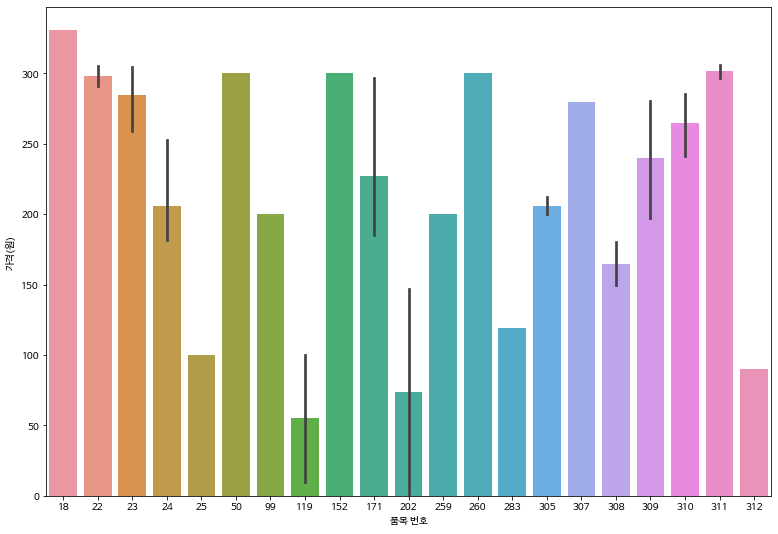

In [19]:
plt.figure(figsize = (13,9))
sns.barplot(data = df_two.head(500), x='품목 번호', y = '가격(원)')
plt.show()

In [20]:
df_two = df_two.iloc[1:317146,:]
df_two

,시장/마트 번호,품목 번호,가격(원),년도-월,자치구 코드
70063,213,119,10,2019-07,500000
261572,214,312,90,2021-05,470000
243730,102,25,100,2021-02,470000
65247,146,310,100,2019-08,710000
87660,114,311,100,2019-06,545000
...,...,...,...,...,...
244208,45,50,210000,2021-02,680000
179632,40,58,260520,2020-07,500000
92710,63,58,288200,2019-05,170000
148594,10,256,310000,2020-10,170000


In [21]:
df_two['년도-월'] = pd.to_datetime(df_two['년도-월'])

<ipython-input-21-0cfb276ddd37>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_two['년도-월'] = pd.to_datetime(df_two['년도-월'])


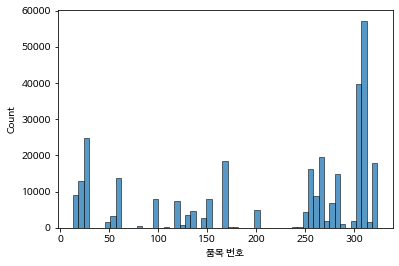

In [22]:
sns.histplot(data=df_two, x="품목 번호")

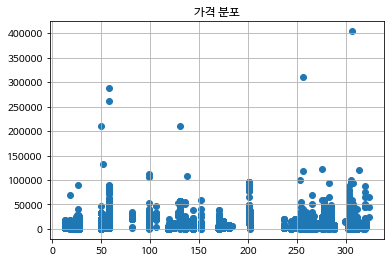

In [23]:
x = df_two['품목 번호']
y = df_two['가격(원)']
plt.scatter(x,y)
plt.title('가격 분포')
plt.grid(True)
plt.show()

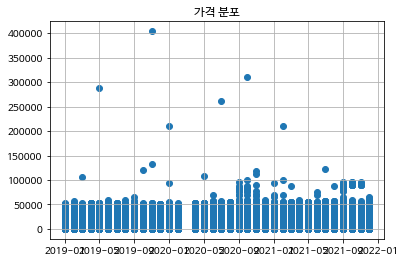

In [24]:
x = df_two['년도-월']
y = df_two['가격(원)']
plt.scatter(x,y)
plt.title('가격 분포')
plt.grid(True)
plt.show()

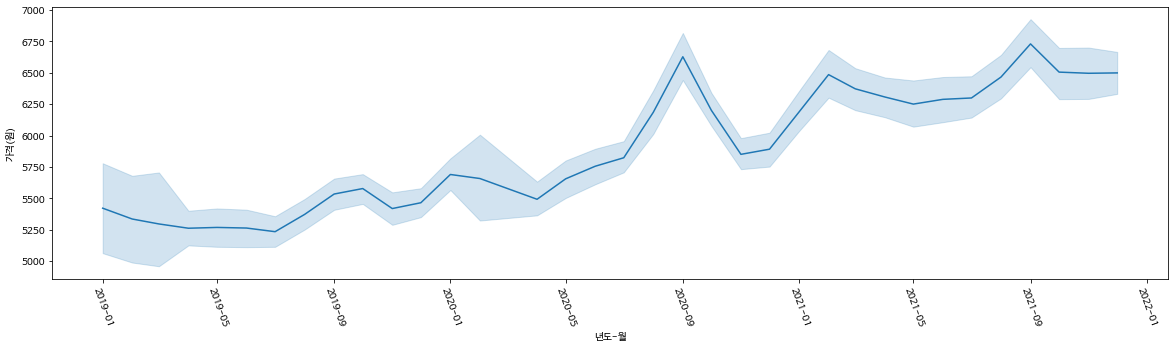

In [25]:
plt.figure(figsize=(20,5))
plt.xticks(rotation = -70 )
sns.lineplot(data = df_two, x='년도-월', y = '가격(원)')

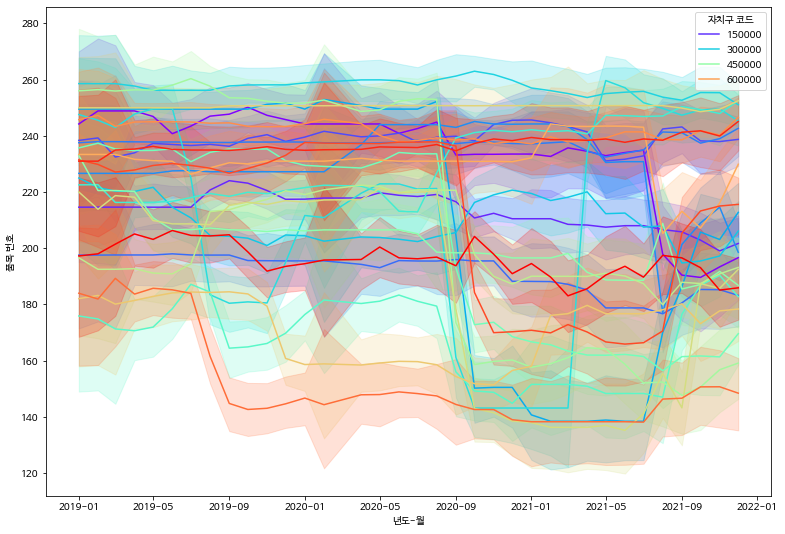

In [26]:
plt.figure(figsize = (13,9))
sns.lineplot(data = df_two, x='년도-월', y = '품목 번호', hue='자치구 코드', palette='rainbow')
plt.show()

In [27]:
df_two['년도-월'] = df_two['년도-월'].dt.year

훈련셋 & 시험셋
- DecisionTreeRegressor

데이터셋 나누기

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error

In [29]:
X = df_two.drop('년도-월', axis=1)
y = df_two['년도-월']
X, y

(        시장/마트 번호  품목 번호   가격(원)  자치구 코드
 70063        213    119      10  500000
 261572       214    312      90  470000
 243730       102     25     100  470000
 65247        146    310     100  710000
 87660        114    311     100  545000
 ...          ...    ...     ...     ...
 244208        45     50  210000  680000
 179632        40     58  260520  500000
 92710         63     58  288200  170000
 148594        10    256  310000  170000
 25965         94    306  403890  260000
 
 [317145 rows x 4 columns], 70063     2019
 261572    2021
 243730    2021
 65247     2019
 87660     2019
           ... 
 244208    2021
 179632    2020
 92710     2019
 148594    2020
 25965     2019
 Name: 년도-월, Length: 317145, dtype: int64)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

** 모델 학습 **

In [31]:
model = DecisionTreeRegressor()

In [32]:
model.fit(X_train, y_train)

DecisionTreeRegressor()

In [33]:
pred = model.predict(X_test)

모델 평가

In [34]:
# RMSE & R²(결정계수)
mean_squared_error(y_test, pred)

0.3253069563514214

In [35]:
mean_squared_error(y_test, pred) ** 0.5

0.57035686754121

In [36]:
mean_squared_error(y_test, pred, squared=False)

0.57035686754121

In [37]:
model.score(X_train, y_train) # R²

0.6402117894698329

In [38]:
model.score(X_test, y_test) # R²

0.48150079039292215

In [39]:
# 모델 튜닝
def test_depth(depth):
    model = DecisionTreeRegressor(random_state=100, max_depth=depth)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    print(f"depth : {depth}")
    print(f'Train RMSE : {mean_squared_error(y_train, train_pred, squared=False)}')
    print(f'Test RMSE : {mean_squared_error(y_test, test_pred, squared=False)}')
    print(f'Train Score : {model.score(X_train, y_train)}')
    print(f'Test Score : {model.score(X_test, y_test)}')
    print('===================================')

In [40]:
for i in range(1, 35):
    test_depth(i)

depth : 1
Train RMSE : 0.7866722122900457
Test RMSE : 0.7858350415166595
Train Score : 0.015611740995891576
Test Score : 0.01572256273549022
depth : 2
Train RMSE : 0.7804310117579784
Test RMSE : 0.779848979084511
Train Score : 0.031169410681339382
Test Score : 0.030660826021858267
depth : 3
Train RMSE : 0.7770695618018574
Test RMSE : 0.7768895383961286
Train Score : 0.03949727557519378
Test Score : 0.03800393645984479
depth : 4
Train RMSE : 0.772326592235252
Test RMSE : 0.772742783450329
Train Score : 0.051186659347988606
Test Score : 0.04824610188229661
depth : 5
Train RMSE : 0.7636239415801295
Test RMSE : 0.7655565521938229
Train Score : 0.0724488292900286
Test Score : 0.06586573210436486
depth : 6
Train RMSE : 0.7553401936541692
Test RMSE : 0.7571971103924472
Train Score : 0.0924637189443589
Test Score : 0.08615478057540493
depth : 7
Train RMSE : 0.7449533410795651
Test RMSE : 0.7468223346622755
Train Score : 0.11725157758486082
Test Score : 0.11102541804273514
depth : 8
Train RMSE 

In [41]:
model = DecisionTreeRegressor(random_state=30, max_depth=5)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=30)

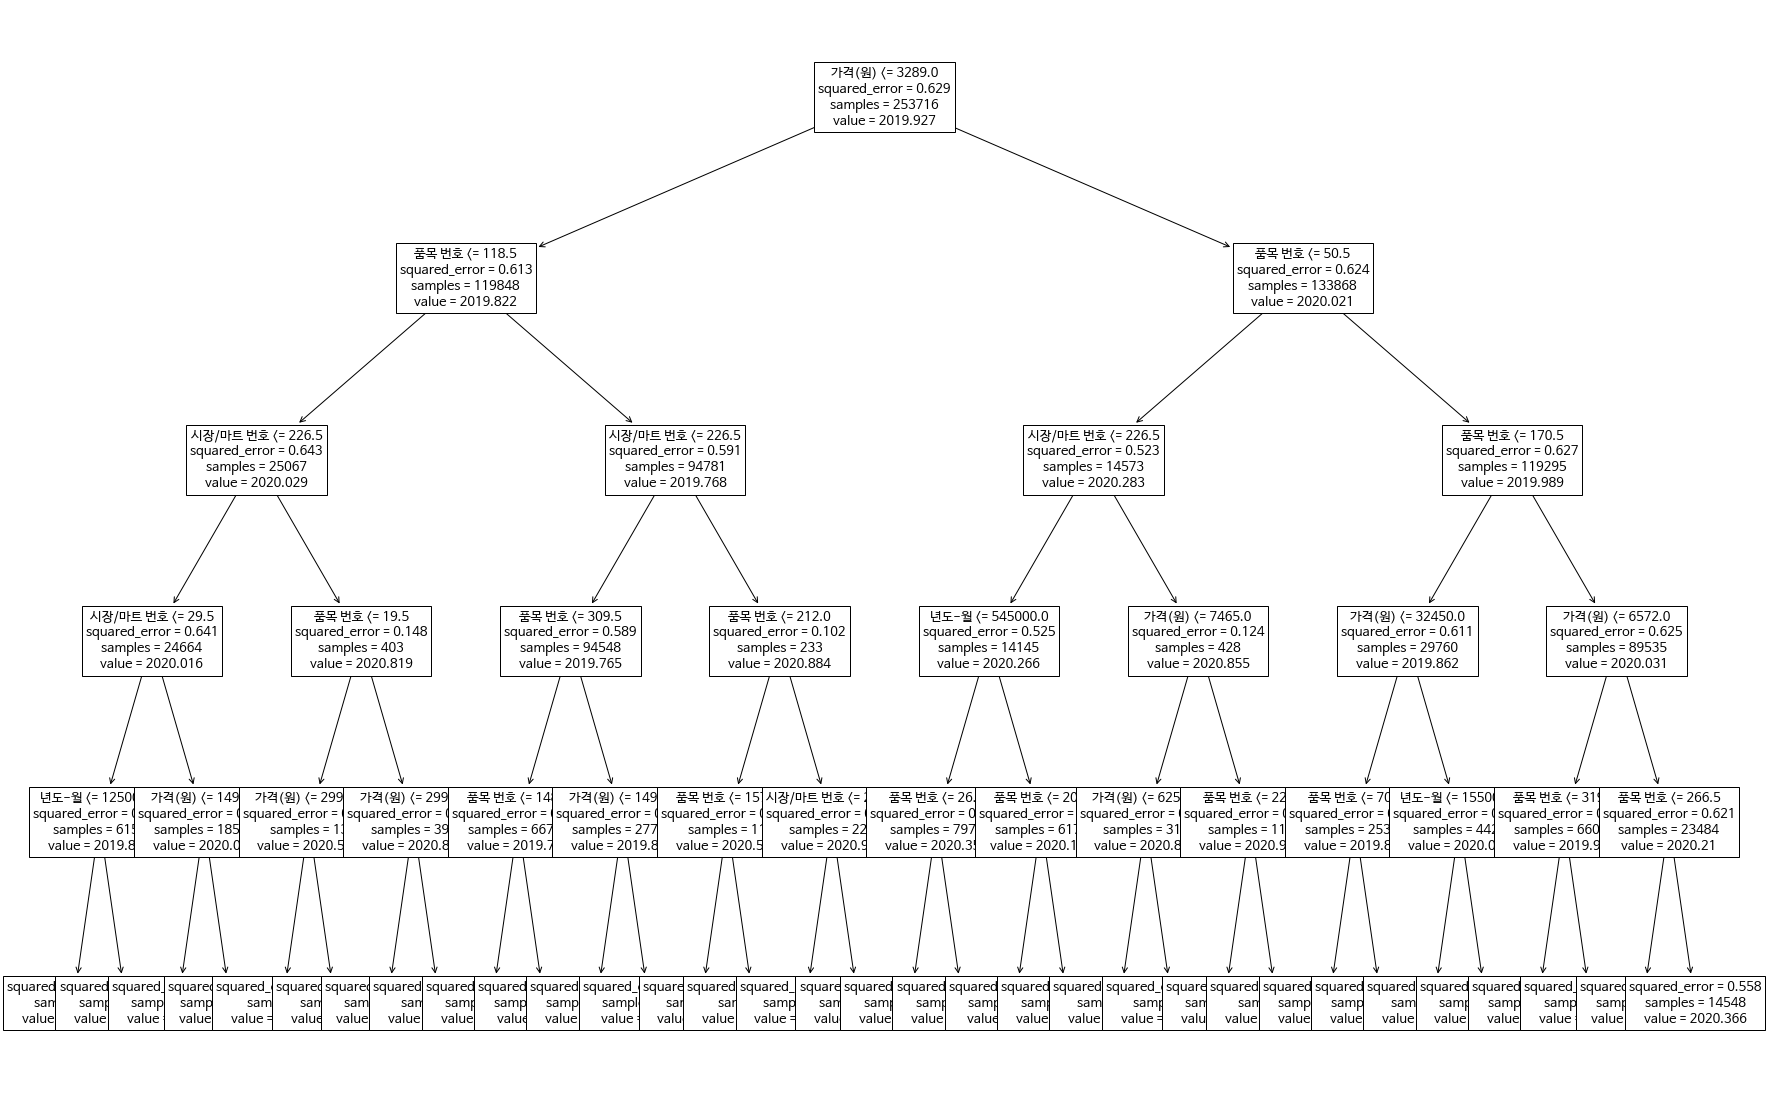

In [42]:
plt.figure(figsize=(30, 20))
plot_tree(model, max_depth=10, fontsize=13, feature_names=df_two.columns)
plt.show()

In [43]:
from sklearn.tree import export_graphviz

In [44]:
export_graphviz(model, out_file="tree.dot",
                feature_names = X.columns, impurity=True, filled=True)

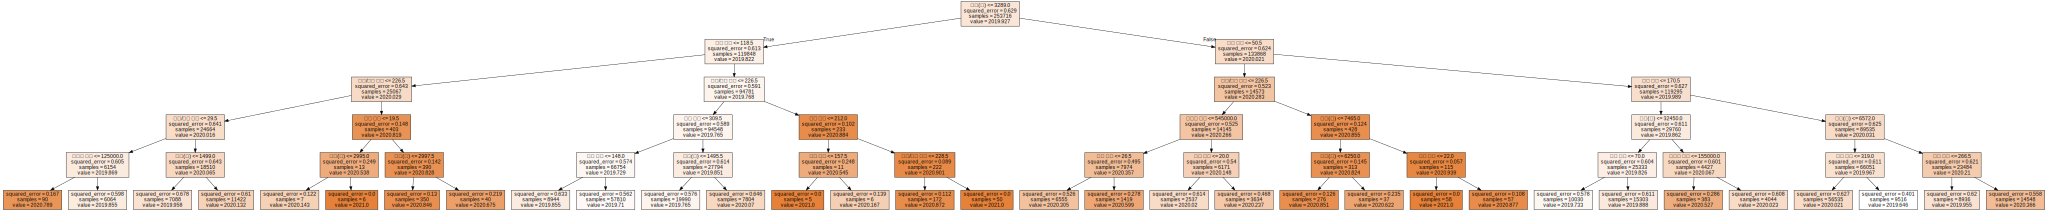

In [45]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz가 읽어서 주피터 노트북상에서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)